## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
Student=pd.read_csv(r"C:\Users\AMOL\Desktop\GL-AUG-9-10-2019\External_Lab_13-10-2019\students-data.csv",delimiter=";")

In [2]:
Student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
Student.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [4]:
Student.index.name='number'
Student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

As there is no missing value in any of the column so our data is good to go for modelling.

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [5]:
Student.select_dtypes(include='object').head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [6]:
Student.select_dtypes(exclude=np.number).shape

(395, 17)

In [7]:
Student.select_dtypes(include='object').shape
#there are 17 columns which contain data types as object

(395, 17)

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [8]:
AA=pd.DataFrame(Student.var()).reset_index()
column_drop=list(AA[AA[0]<1]['index'])
column_drop

['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc']

In [9]:
Student=Student.drop(column_drop,axis=1)

In [10]:
Student.var(axis=0)

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [11]:
from sklearn import preprocessing
LE= preprocessing.LabelEncoder()
Student=Student.apply(LE.fit_transform)

In [12]:
Student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,1,0,0,3,0,2,6,2,3,3
1,0,0,2,1,0,1,1,1,0,2,...,1,1,0,2,0,2,4,2,2,3
2,0,0,0,1,1,1,1,1,0,2,...,1,1,0,1,2,2,10,4,5,7
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,1,0,4,2,12,11,12
4,0,0,1,1,0,1,3,3,2,2,...,1,0,0,1,1,4,4,3,7,7


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [13]:
Student['G1']=np.where(Student['G1']>10,1,0)
Student['G2']=np.where(Student['G2']>10,1,0)
Student['G3']=np.where(Student['G3']>10,1,0)

In [14]:
Student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,1,0,0,3,0,2,6,0,0,0
1,0,0,2,1,0,1,1,1,0,2,...,1,1,0,2,0,2,4,0,0,0
2,0,0,0,1,1,1,1,1,0,2,...,1,1,0,1,2,2,10,0,0,0
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,1,0,4,2,1,1,1
4,0,0,1,1,0,1,3,3,2,2,...,1,0,0,1,1,4,4,0,0,0


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [15]:
X=Student.drop('G3',axis=1)
y=Student['G3']
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,0,4,4,0,4,...,1,1,0,0,3,0,2,6,0,0
1,0,0,2,1,0,1,1,1,0,2,...,0,1,1,0,2,0,2,4,0,0
2,0,0,0,1,1,1,1,1,0,2,...,1,1,1,0,1,2,2,10,0,0
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,1,1,0,4,2,1,1
4,0,0,1,1,0,1,3,3,2,2,...,1,1,0,0,1,1,4,4,0,0


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

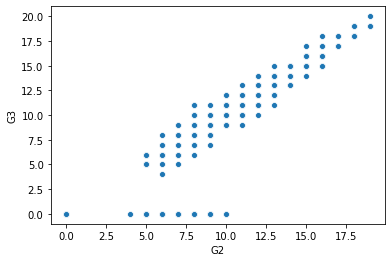

In [16]:
sns.scatterplot(x='G2',y='G3',data=pd.read_csv(r"C:\Users\AMOL\Desktop\GL-AUG-9-10-2019\External_Lab_13-10-2019\students-data.csv",delimiter=";"))

In [17]:
pd.crosstab(Student['G2'],Student['G3'])

G3,0,1
G2,,
0,292,13
1,3,87


In [18]:
pd.crosstab(Student['G1'],Student['G3'])

G3,0,1
G1,,
0,277,23
1,18,77



The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

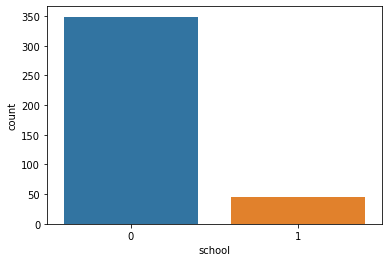

In [19]:
sns.countplot(x='school',data=Student)

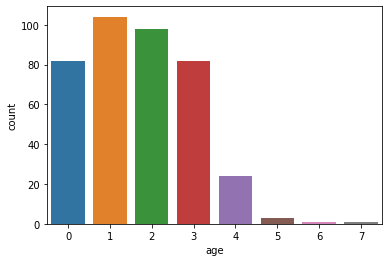

In [20]:
sns.countplot(x='age',data=Student)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [21]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.24)

Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((300, 26), (95, 26), (300,), (95,))

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(Xtrain,ytrain)

C:\Users\AMOL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Training Acurracy
ypredict=model.predict(Xtest)
model_score = model.score(Xtrain, ytrain)
model_score


0.96

In [24]:
#Test Accuracy
model_score = model.score(Xtest, ytest)
model_score

0.9578947368421052

In [25]:
#f1_score,classification report,Confusion matrix
from sklearn.metrics import f1_score,classification_report,confusion_matrix
print(f1_score(ypredict,ytest))
print(confusion_matrix(ytest, ypredict))
print(classification_report(ytest, ypredict))

0.9090909090909091
[[71  2]
 [ 2 20]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        73
           1       0.91      0.91      0.91        22

    accuracy                           0.96        95
   macro avg       0.94      0.94      0.94        95
weighted avg       0.96      0.96      0.96        95



# Naive bayes with Iris data

### Import Iris.csv

In [26]:
Iris=pd.read_csv(r"C:\Users\AMOL\Desktop\GL-AUG-9-10-2019\External_Lab_13-10-2019\Iris (2).csv")

In [27]:
Iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
Iris.dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                    object
dtype: object

In [29]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [30]:
Iris.Class.replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[1,2,3],inplace=True)

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [31]:
X=Iris.drop('Class',axis=1)
y=Iris['Class']

### Find the distribution of target variable (Class)

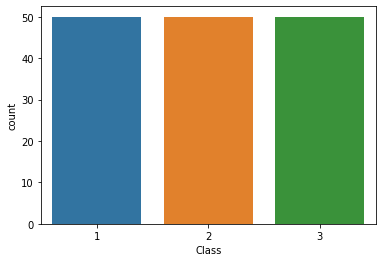

In [32]:
sns.countplot(x='Class',data=Iris)

### Plot the distribution of target variable using histogram

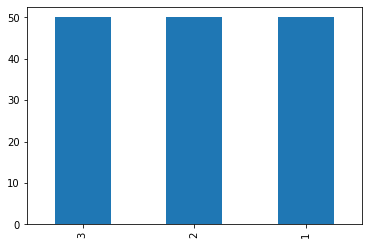

In [33]:
pd.value_counts(Iris["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\AMOL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\AMOL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


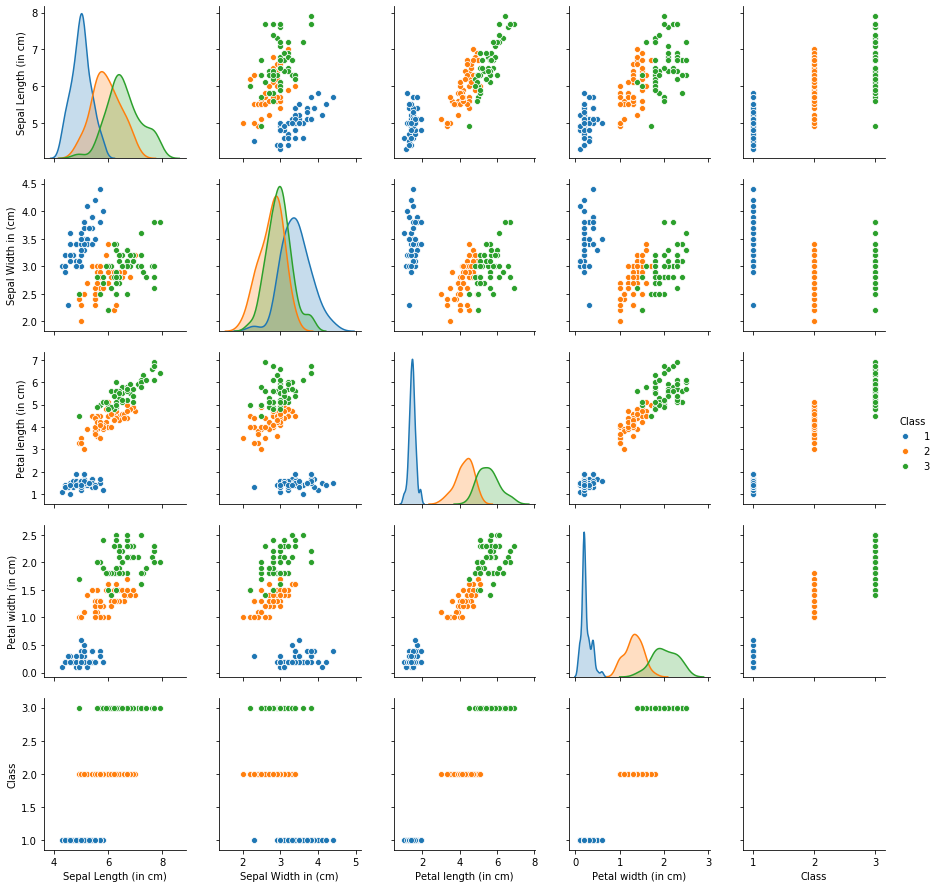

In [34]:
sns.pairplot(Iris,diag_kind='kde',hue='Class')

Petal width and petal length is a better feature to predict class.

### Summary Statistics and explain insights for at least 2 variables

In [35]:
Iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
Class,150.0,2.000000,0.819232,1.0,1.0,2.00,3.0,3.0


Sepal width and petal width have low standard deviation which means they are not a good variable to do predication

### Correlation among all variables and give your insights

In [36]:
Iris.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


Petal length and petal width have strong correlation among themself so we can drop any one of variable while bulding model

### Split data in Training and Validation in 80:20

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

### Do Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

### Train and Fit NaiveBayes Model

In [39]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [40]:
y_predict = model.predict(X_test)

In [41]:
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.93      1.00      0.96        13
           3       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
